In [11]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Load dataset
mnist = fetch_openml('mnist_784')

In [12]:

print(mnist.data.shape) # shape ist 70k Datensätze mit einer Länge von 28*28 = 784

(70000, 784)


In [13]:
print(mnist.data) # Gibt die Daten aus

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel7

In [14]:
print(mnist.target.shape) # Anzahl der Labels

(70000,)


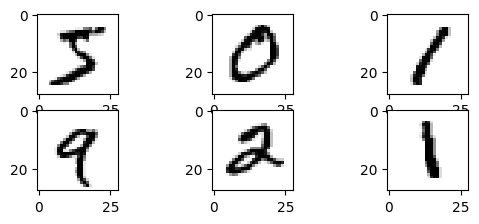

In [20]:
# Using Matplotlib visualizing the handwritten digits

image= mnist.data.to_numpy()

plt.subplot(431)
plt.imshow((image[0].reshape(28,28)), cmap=plt.cm.gray_r, 
interpolation='nearest')
plt.subplot(432)
plt.imshow(image[1].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')
plt.subplot(433)
plt.imshow(image[3].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')
plt.subplot(434)
plt.imshow(image[4].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')
plt.subplot(435)
plt.imshow(image[5].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')
plt.subplot(436)
plt.imshow(image[6].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')

In [21]:
# Dividing the dataset into training data and test data
### Kann vllt durch sklearn.model_selection.train_test_split ersetzt werden -> siehe unten
#from sklearn.model_selection import train_test_split
# Shuffle and split data into training and test set
#X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=15000, random_state=42)

index_number = np.random.permutation(70000)

x1,y1=mnist.data.loc[index_number],mnist.target.loc[index_number]

x1.reset_index(drop=True,inplace=True)
y1.reset_index(drop=True,inplace=True)

x_train , x_test = x1[:55000], x1[55000:]
y_train , y_test = y1[:55000], y1[55000:]

In [23]:
#Step 6: Implementing the SVM algorithm and calculating its accuracy

svc = svm.SVC(gamma='scale', class_weight='balanced', C=100)

svc.fit(x_train, y_train)

result = svc.predict(x_test)

print('Accuracy:', accuracy_score(y_test, result))
print(classification_report(y_test, result))

Accuracy: 0.9838
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1480
           1       0.99      0.99      0.99      1724
           2       0.98      0.98      0.98      1473
           3       0.98      0.98      0.98      1572
           4       0.99      0.99      0.99      1486
           5       0.98      0.98      0.98      1327
           6       0.99      0.99      0.99      1417
           7       0.98      0.98      0.98      1588
           8       0.98      0.98      0.98      1425
           9       0.98      0.97      0.98      1508

    accuracy                           0.98     15000
   macro avg       0.98      0.98      0.98     15000
weighted avg       0.98      0.98      0.98     15000



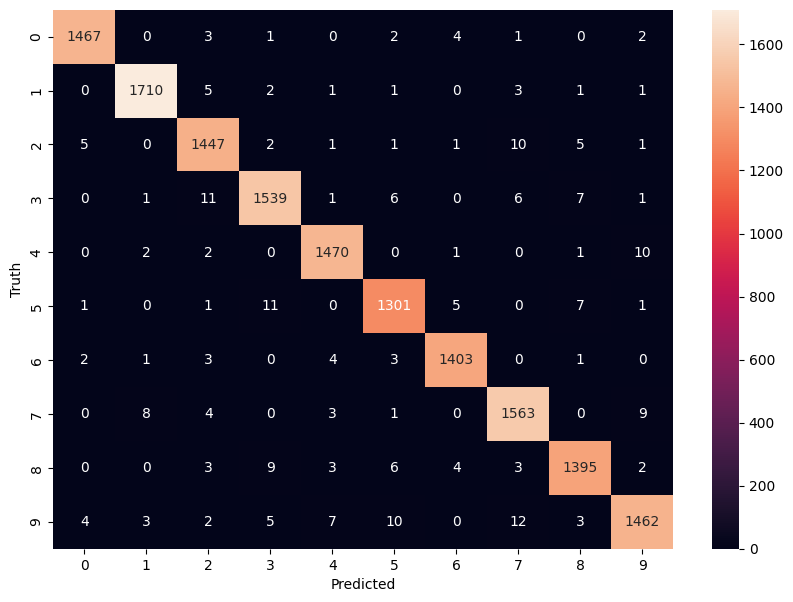

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, result)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()